In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("/Users/alexis/Cranfield/AI/assignment/data/train.csv")
val_df = pd.read_csv("/Users/alexis/Cranfield/AI/assignment/data/val.csv")
test_df = pd.read_csv("/Users/alexis/Cranfield/AI/assignment/data/test.csv")

In [3]:
train_df.head()

,image_id,class_name,rad_id,x_min,y_min,x_max,y_max,class_id
0,8138c0bc649a534f449cf703475528ec,Cardiomegaly,R9,835.0,1298.0,1863.0,1662.0,3
1,e8e6ff19c3be05a4ccfb20abc4202d52,Pleural thickening,R10,1768.0,360.0,2130.0,532.0,11
2,de6d6efd88431d3253198106bb070471,No finding,R8,NaN,NaN,NaN,NaN,14
3,01ee6e560f083255a630c41bba779405,Pulmonary fibrosis,R8,1396.0,398.0,1523.0,567.0,13
4,da668869900c862ce12bd06fde5feb8d,Pulmonary fibrosis,R9,1780.0,347.0,2467.0,1246.0,13


In [4]:
val_df.head()

,image_id,class_name,rad_id,x_min,y_min,x_max,y_max,class_id
0,a6bcb9f5d59588d699c5aa83cd3039c7,Nodule/Mass,R10,1801.0,706.0,1890.0,785.0,8
1,4d0664ac3d522bb232afecc65ebb40ca,No finding,R4,NaN,NaN,NaN,NaN,14
2,5806d4429fb183d924976bfd1dfbd4d9,No finding,R15,NaN,NaN,NaN,NaN,14
3,89c2a2ceb6ecf060afecbd7ed85fd24d,No finding,R2,NaN,NaN,NaN,NaN,14
4,00675cd546313f912cadd4ad54415d69,Cardiomegaly,R9,984.0,1486.0,2217.0,1941.0,3


In [5]:
test_df.head()

,image_id,class_name,rad_id,x_min,y_min,x_max,y_max,class_id
0,27b822c5d3b354f096dfb788fd3fa636,Nodule/Mass,R10,277.0,602.0,1177.0,2417.0,8
1,d2ca714f8f06979acfbc0992d65fb211,No finding,R3,NaN,NaN,NaN,NaN,14
2,19367e88f4634c2652d3eed0a2f1f8b2,No finding,R15,NaN,NaN,NaN,NaN,14
3,852ec6a0bcb9608ffee9b3fda0867f91,Aortic enlargement,R8,1669.0,896.0,1972.0,1326.0,0
4,aa9c3097e6d2df7216be1a1642f683c9,No finding,R5,NaN,NaN,NaN,NaN,14


In [6]:
print("Training size:", train_df.shape)
print("Validation size :", val_df.shape)
print("Test size: ", test_df.shape)

Training size: (51953, 8)
Validation size : (5773, 8)
Test size:  (10188, 8)


In [7]:
import numpy as np

print("Training labels:", np.bincount(train_df['class_id']))
print("Validation labels:", np.bincount(val_df['class_id']))
print("Test labels:", np.bincount(test_df['class_id']))

Training labels: [ 5479   213   734  4152   426   765   954  1899  1974  1685  1894  3704
   173  3561 24340]
Validation labels: [ 609   24   82  461   47   85  106  211  219  187  210  412   19  396
 2705]
Test labels: [1074   42  144  814   83  150  187  373  387  331  372  726   34  698
 4773]


### Labels Distribution

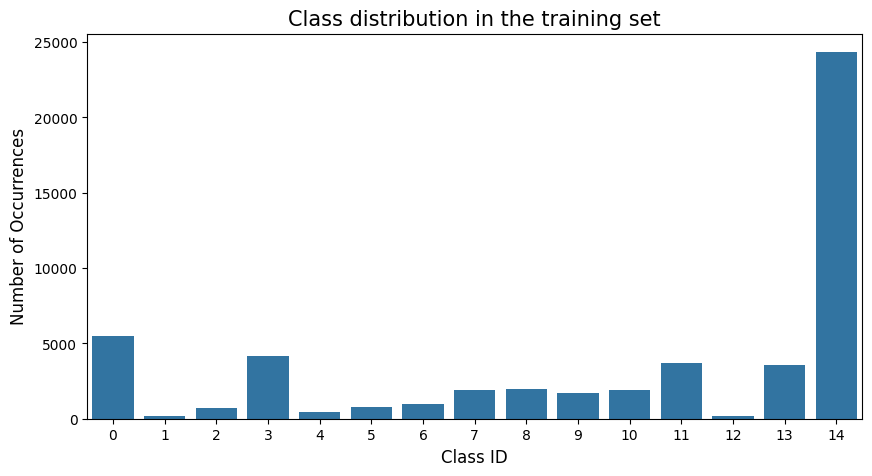

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

classes = train_df['class_id'].unique()
classes.sort()
class_counts = train_df['class_id'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class distribution in the training set', fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class ID', fontsize=12)
plt.show()

In [9]:
print("Training set class distribution")
train_df['class_id'].value_counts().sort_index()

Training set class distribution


class_id
0      5479
1       213
2       734
3      4152
4       426
5       765
6       954
7      1899
8      1974
9      1685
10     1894
11     3704
12      173
13     3561
14    24340
Name: count, dtype: int64

### Zero-rule baseline (majority class classifier)

In [10]:
from collections import Counter

train_counter = Counter()
for class_id in train_df['class_id']:
    train_counter.update([class_id])

val_counter = Counter()
for class_id in val_df['class_id']:
    val_counter.update([class_id])

test_counter = Counter()
for class_id in test_df['class_id']:
    test_counter.update([class_id])

print("\nTraining label distribution:")
print(sorted(train_counter.items()))

print("\nValidation label distribution:")
print(sorted(val_counter.items()))

print("\nTest label distribution:")
print(sorted(test_counter.items()))


Training label distribution:
[(0, 5479), (1, 213), (2, 734), (3, 4152), (4, 426), (5, 765), (6, 954), (7, 1899), (8, 1974), (9, 1685), (10, 1894), (11, 3704), (12, 173), (13, 3561), (14, 24340)]

Validation label distribution:
[(0, 609), (1, 24), (2, 82), (3, 461), (4, 47), (5, 85), (6, 106), (7, 211), (8, 219), (9, 187), (10, 210), (11, 412), (12, 19), (13, 396), (14, 2705)]

Test label distribution:
[(0, 1074), (1, 42), (2, 144), (3, 814), (4, 83), (5, 150), (6, 187), (7, 373), (8, 387), (9, 331), (10, 372), (11, 726), (12, 34), (13, 698), (14, 4773)]


In [ ]:
majority_class = test_counter.most_common(1)[0]
print("Majority class:", majority_class[0])

baseline_acc = majority_class[1] / sum(test_counter.values())
print("Accuracy when always predicting the majority class:")
print(f"{baseline_acc:.2f} ({baseline_acc*100:.2f}%)")

In [1]:
import torch

torch.manual_seed(123)

In [2]:
from ChestXrayDataModule import ChestXrayDataModule

train_df_path = "/Users/alexis/Cranfield/AI/assignment/data/train.csv"
val_df_path = "/Users/alexis/Cranfield/AI/assignment/data/val.csv"
test_df_path = "/Users/alexis/Cranfield/AI/assignment/data/test.csv"
hdf5_path = "/Volumes/ALEXIS/ai_project_cranfield/dicom_images_final.hdf5"

dataModule = ChestXrayDataModule(
    train_dataset_path=train_df_path,
    val_dataset_path=val_df_path,
    test_dataset_path=test_df_path,
    hdf5_path=hdf5_path,
    batch_size=4,
    num_workers=8
)

In [3]:
from ChestXrayLightningModel import ChestXrayLightningModel

model = ChestXrayLightningModel(
    learning_rate=0.005,
    num_classes=15
)

In [4]:
import lightning as L

trainer = L.Trainer(
    max_epochs=10,
    accelerator="gpu",
    devices="auto",
    deterministic=True,
)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/alexis/Cranfield/AI/assignment/chest-x-ray-abnormalities-detection/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


In [ ]:
""" model.train()
dataModule.setup("fit")
trainer.fit(model, datamodule=dataModule) """

In [5]:
dataModule.setup("test")

In [6]:
import numpy as np


def format_prediction_string(labels, boxes, scores):
    pred_strings = []
    for j in zip(labels, scores, boxes):
        pred_strings.append(
            "{0} {1:.4f} {2} {3} {4} {5}".format(
                j[0], j[1], j[2][0], j[2][1], j[2][2], j[2][3]
            )
        )
    return " ".join(pred_strings)

In [7]:
model = ChestXrayLightningModel.load_from_checkpoint(
    "/Users/alexis/Cranfield/AI/assignment/Faster-R-CNN/model/version_14/checkpoints/epoch=9-step=9260.ckpt",
    num_classes=15,
)

In [8]:
detection_threshold = 0.4
results = []
model.model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [9]:
# Ensure the model is on GPU if available
model.to('cuda' if torch.cuda.is_available() else 'cpu')

ChestXrayLightningModel(
  (model): FasterRCNN(
    (transform): GeneralizedRCNNTransform(
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        Resize(min_size=(800,), max_size=1333, mode='bilinear')
    )
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): FrozenBatchNorm2d(64, eps=0.0)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): FrozenBatchNorm2d(64, eps=0.0)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): FrozenBatchNorm2d(64, eps=0.0)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  

In [11]:
from tqdm import tqdm

results = []
with torch.inference_mode():
    for image_ids, images, _ in tqdm(dataModule.test_dataloader(), desc="Evaluating"):
        outputs = model(images)
        for i, output in enumerate(outputs):
            image_id = image_ids[i]
            result = {"image_id": image_id, "PredictionString": "14 1.0 0 0 1 1"}

            boxes = output["boxes"].data.cpu().numpy()
            labels = output["labels"].data.cpu().numpy() - 1
            scores = output["scores"].data.cpu().numpy()

            # Assuming detection_threshold is defined
            valid = scores >= detection_threshold

            if valid.any():
                result = {
                    "image_id": image_id,
                    "PredictionString": format_prediction_string(
                        labels[valid], boxes[valid], scores[valid]
                    ),
                }
            
            print(result)

            results.append(result)


df = pd.DataFrame(results, columns=["image_id", "PredictionString"])

Evaluating:   0%|          | 1/1757 [00:18<8:55:26, 18.30s/it]

{'image_id': '27b822c5d3b354f096dfb788fd3fa636', 'PredictionString': '8 0.8928 69.38096618652344 116.62224578857422 86.6138687133789 133.91175842285156 0 0.8732 112.89633178710938 70.56173706054688 138.8718719482422 100.48268127441406 8 0.8073 175.08900451660156 145.5911102294922 181.0615997314453 151.89627075195312 8 0.7882 35.42214584350586 124.0315933227539 40.95875930786133 131.5504913330078 8 0.7735 168.79669189453125 109.6122055053711 175.3958740234375 114.38080596923828 8 0.7421 51.692481994628906 116.00086212158203 58.26260757446289 120.69606018066406 3 0.7322 83.06791687011719 137.2764434814453 163.2445831298828 168.31044006347656 8 0.6729 34.32096862792969 162.9665069580078 41.514930725097656 169.59893798828125 8 0.6681 46.89222717285156 105.73015594482422 52.8055534362793 110.87127685546875 8 0.5857 51.506587982177734 114.08540344238281 60.29948425292969 121.21923828125 8 0.5070 62.850830078125 116.72383880615234 67.71094512939453 120.38460540771484 11 0.4931 21.695070266723

Evaluating:   0%|          | 2/1757 [00:21<4:40:04,  9.58s/it]

{'image_id': 'aa9c3097e6d2df7216be1a1642f683c9', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': 'bb541cb8a793063968903bf3fc5b68f7', 'PredictionString': '0 0.9770 122.80204772949219 39.90216064453125 142.19229125976562 63.13593292236328 3 0.9733 104.5771484375 89.35327911376953 171.29122924804688 114.15386199951172 11 0.5260 131.34640502929688 23.44124412536621 158.0930633544922 31.16642951965332 11 0.4303 80.11498260498047 23.77183723449707 102.4603500366211 34.76554489135742 11 0.4264 148.18934631347656 23.838544845581055 159.42930603027344 33.12248611450195'}
{'image_id': '0101ad90f31ddb8fb24e9935a3dac9db', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': '2a96f7ac3c6c3d856692929767006892', 'PredictionString': '14 1.0 0 0 1 1'}


Evaluating:   0%|          | 3/1757 [00:24<3:14:20,  6.65s/it]

{'image_id': '2b33f3a742af2c0d8fce8a2a808ea409', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': '9fe9aeb925c5187479ca1bf325040a65', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': '522dea0833b59836405679f464299eac', 'PredictionString': '11 0.8766 73.53074645996094 13.210432052612305 102.421142578125 25.179210662841797 11 0.8398 126.71528625488281 13.625965118408203 154.3531036376953 25.250455856323242 11 0.6996 52.31689453125 147.7076873779297 63.32757568359375 159.78138732910156 10 0.6751 160.4493865966797 144.74029541015625 174.6006317138672 164.0594482421875 11 0.6402 75.3311996459961 16.489736557006836 96.96298217773438 23.56389808654785 11 0.6041 122.95785522460938 11.371065139770508 158.5264892578125 31.467777252197266 11 0.5200 164.02102661132812 149.5199737548828 173.68544006347656 163.26473999023438 10 0.4985 165.08908081054688 147.3728485107422 173.46632385253906 162.97406005859375 10 0.4962 156.6766815185547 139.38168334960938 175.53846740722656 169.7888946533203 9 0.

Evaluating:   0%|          | 4/1757 [00:28<2:35:07,  5.31s/it]

{'image_id': 'fc50039c45fdb6c9224bfff5ba4e64b3', 'PredictionString': '8 0.8442 40.31149673461914 96.01470947265625 61.132259368896484 111.54225158691406 8 0.7720 57.12699508666992 55.207088470458984 77.3942642211914 74.25776672363281 10 0.5129 194.8577423095703 170.20790100097656 203.6028594970703 181.32949829101562 11 0.5121 13.522947311401367 167.92788696289062 27.49553108215332 180.6807403564453 8 0.5118 64.0278091430664 77.65999603271484 71.3253402709961 84.81063842773438 10 0.4988 14.1812162399292 165.2611083984375 28.848644256591797 179.6734619140625 8 0.4857 59.10820007324219 56.68914794921875 84.6758041381836 79.67115020751953 11 0.4820 195.47828674316406 172.1232147216797 203.37908935546875 182.71197509765625 13 0.4795 135.68768310546875 47.070404052734375 193.74493408203125 111.16459655761719 11 0.4601 16.329267501831055 170.31480407714844 25.006925582885742 179.0946807861328 8 0.4600 41.10612869262695 102.48407745361328 52.25838851928711 111.0076675415039 0 0.4579 112.314643

Evaluating:   0%|          | 5/1757 [00:31<2:14:50,  4.62s/it]

{'image_id': '93abddc3fe8d832eac4e48ef666437cd', 'PredictionString': '3 0.9851 89.27140045166016 102.93556213378906 190.39642333984375 140.93006896972656 0 0.9513 116.31659698486328 41.300689697265625 149.6797332763672 71.92257690429688 11 0.7682 75.0792236328125 16.742355346679688 98.2991714477539 23.112510681152344 11 0.6983 70.21704864501953 16.634634017944336 102.0825424194336 25.94936752319336 11 0.6270 68.10232543945312 19.33954620361328 79.31616973876953 27.851755142211914 11 0.4083 66.09699249267578 17.207717895507812 87.56852722167969 29.15872573852539'}
{'image_id': 'bfe751a05700d19728f9a56d2524a98a', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': '59b1dc77610f1c18cf6524b476128321', 'PredictionString': '8 0.7526 127.20283508300781 64.31192016601562 160.24310302734375 103.35369873046875 13 0.7502 137.39955139160156 27.64154052734375 166.98033142089844 53.427005767822266 11 0.6577 120.18386840820312 19.790151596069336 153.67445373535156 28.115739822387695 8 0.5471 142.87541

Evaluating:   0%|          | 6/1757 [00:35<2:05:09,  4.29s/it]

{'image_id': 'd3ef9ae515fb3cd3565e2c9875b3e0aa', 'PredictionString': '13 0.7924 56.742820739746094 37.27812194824219 94.66773223876953 66.50630950927734 11 0.7726 56.313682556152344 32.37049865722656 87.5090560913086 41.9376335144043 13 0.7265 170.00381469726562 70.1395034790039 183.5823516845703 75.80126953125 11 0.5489 24.779882431030273 136.0309600830078 36.43619155883789 147.5306854248047 13 0.5209 56.12800216674805 48.79209899902344 87.01595306396484 65.9259033203125 13 0.4844 173.38377380371094 86.91146087646484 187.66162109375 91.5996322631836 13 0.4421 166.75917053222656 69.45011138916016 185.6727752685547 79.34901428222656 0 0.4137 109.47938537597656 64.15483093261719 134.44688415527344 85.24706268310547 11 0.4062 51.89744567871094 31.204700469970703 92.78221130371094 46.75550079345703'}
{'image_id': 'ec50aa95bd69eacf7b639c580a4f8bb0', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': '328a03f1cf631960207c6f6f3026bdb1', 'PredictionString': '0 0.9856 111.08682250976562 52.2537

Evaluating:   0%|          | 7/1757 [00:38<1:55:17,  3.95s/it]

{'image_id': '695b29b1efb0cc694f32a00a2d072f0b', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': 'ae2ee40dc4a0a53a87e85f1b3f9e159a', 'PredictionString': '0 0.8333 76.89088439941406 62.1424446105957 104.56791687011719 90.32196807861328 3 0.6361 38.154903411865234 129.09002685546875 148.28077697753906 172.80642700195312 11 0.4954 70.71224212646484 30.883573532104492 91.1316146850586 35.76993179321289 7 0.4405 34.00607681274414 112.05474090576172 92.6182861328125 169.67041015625 13 0.4146 42.43717575073242 103.19044494628906 75.7060775756836 117.72631072998047'}
{'image_id': '6ee4ddeccef1ef0b04fd519822dbe176', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': '69264b8eef78c43726b78a6fba59d962', 'PredictionString': '9 0.5905 86.67953491210938 65.33818054199219 104.31977081298828 97.24079895019531'}


Evaluating:   0%|          | 8/1757 [00:41<1:49:32,  3.76s/it]

{'image_id': '873fc048d8a429794f8d5675ed0638fb', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': '6c52edbfaea1be8334fd862161a8f4e4', 'PredictionString': '0 0.9627 118.43889617919922 71.38524627685547 144.15293884277344 93.09223175048828 11 0.6498 191.75062561035156 198.95509338378906 202.28504943847656 207.53921508789062 10 0.6137 191.7054901123047 193.78167724609375 202.51280212402344 207.3608856201172 10 0.6066 12.451581001281738 191.55796813964844 24.121171951293945 204.77781677246094 13 0.5833 146.3862762451172 54.35224533081055 184.4541778564453 87.5202407836914 11 0.4553 12.478718757629395 193.99249267578125 23.5594425201416 205.56214904785156 11 0.4062 190.0781707763672 194.5523681640625 202.75936889648438 208.97206115722656'}
{'image_id': '9146bc5c8c48b15972619c515604c408', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': 'd9b51a0471d1ea9b698c9a88c7888925', 'PredictionString': '14 1.0 0 0 1 1'}


Evaluating:   1%|          | 9/1757 [00:45<1:48:31,  3.72s/it]

{'image_id': '6c62972a4eeaf465e0461d4d74394366', 'PredictionString': '0 0.8402 83.36894226074219 51.308921813964844 121.92523193359375 83.20845031738281 11 0.7237 62.50586700439453 22.28896713256836 94.43142700195312 31.525930404663086 11 0.6321 68.07440948486328 23.34431266784668 93.67969512939453 28.664949417114258 13 0.6099 52.8582878112793 29.312013626098633 93.95905303955078 65.12666320800781 3 0.5552 46.64847946166992 108.599853515625 135.81747436523438 135.10861206054688 11 0.5426 46.6657829284668 27.54300308227539 65.60802459716797 42.83424758911133 11 0.5015 48.372947692871094 30.18581771850586 60.85179901123047 40.78997039794922 8 0.4849 83.78641510009766 51.21919250488281 105.52715301513672 78.0285415649414 8 0.4810 50.516056060791016 101.18138885498047 94.58692169189453 131.5595703125 11 0.4407 55.7701530456543 23.06686782836914 93.64266967773438 36.8242073059082'}
{'image_id': 'b6d76cce331d0552a4bb3e4562dad8bb', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': '33cffa5ef

Evaluating:   1%|          | 10/1757 [00:49<1:52:21,  3.86s/it]

{'image_id': '924eb4734344e5808df5d15855d68178', 'PredictionString': '3 0.8390 99.61537170410156 115.13721466064453 176.63262939453125 154.53826904296875 11 0.8135 129.89785766601562 33.765625 159.8004608154297 42.3607063293457 0 0.7587 119.29157257080078 67.6592025756836 142.740478515625 93.09407043457031 13 0.7283 136.2552947998047 38.08533477783203 152.74403381347656 60.71486282348633 13 0.5899 69.77583312988281 62.492610931396484 80.35899353027344 72.8195571899414 11 0.5405 146.41334533691406 33.60192108154297 160.74952697753906 42.022579193115234 13 0.5123 69.66510009765625 37.898101806640625 101.06761169433594 73.59498596191406 11 0.5063 130.63314819335938 34.201683044433594 151.2346954345703 39.56513214111328 6 0.4959 149.1693115234375 101.7500228881836 186.1744384765625 153.94065856933594 11 0.4736 135.49087524414062 33.27254104614258 166.3207244873047 48.4268913269043 11 0.4488 76.66967010498047 34.88661193847656 104.35174560546875 44.00009536743164 13 0.4312 139.4160003662109

Evaluating:   1%|          | 11/1757 [00:54<1:57:07,  4.03s/it]

{'image_id': 'aff9b5fa191d69543827088db17e6aa8', 'PredictionString': '8 0.6133 76.33366394042969 56.36619186401367 108.37760162353516 84.34020233154297 0 0.5801 80.88573455810547 55.35158920288086 119.66815948486328 86.25518798828125 11 0.5401 134.32411193847656 26.7628116607666 158.3924102783203 32.49943923950195 11 0.4683 126.85203552246094 26.126245498657227 161.6706085205078 34.7349739074707 8 0.4579 40.38801956176758 101.29743957519531 86.9546890258789 140.22438049316406'}
{'image_id': '8f0256af9634bee76dccf87a76b03c0f', 'PredictionString': '14 1.0 0 0 1 1'}
{'image_id': '84e9f232df2236e9dc7f7f472ff26bee', 'PredictionString': '8 0.5823 77.2928237915039 63.61411666870117 100.47843170166016 86.74855041503906 0 0.4170 77.31869506835938 62.28225326538086 104.62646484375 88.93020629882812'}
{'image_id': '5b96a79b2f850d88b7b265f777bc8da8', 'PredictionString': '14 1.0 0 0 1 1'}


Evaluating:   1%|          | 11/1757 [01:34<4:09:35,  8.58s/it]


KeyboardInterrupt: 

In [ ]:
""" model = ChestXrayLightningModel.load_from_checkpoint(
    "/Users/alexis/Cranfield/AI/assignment/Faster-R-CNN/model/epoch=9-step=9260.ckpt",
    num_classes=15,
)

dataModule.setup("test")    
train_acc = trainer.test(dataloaders=dataModule.test_dataloader(), model=model) """

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_image_with_boxes(image, boxes, labels=None, figsize=(10, 10)):
    """
    Visualize an image with its bounding boxes.

    Parameters:
    - image: a PIL.Image or numpy array of the image.
    - boxes: a list of bounding boxes, each defined by a list of four values [x_min, y_min, x_max, y_max].
    - labels: (Optional) a list of labels for each bounding box.
    - figsize: size of the figure to display.
    """
    # If the image is a torch tensor, convert it to a numpy array
    if torch.is_tensor(image):
        image = image.numpy().transpose((1, 2, 0))
    elif isinstance(image, Image.Image):
        image = np.array(image)

    # Normalize the image array to 0-1 range if it's not already
    if image.max() > 1.0:
        image = image / 255

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.imshow(image)

    for i, box in enumerate(boxes):
        x_min, y_min, x_max, y_max = box
        width, height = x_max - x_min, y_max - y_min

        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2,
                                 edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        if labels is not None and i < len(labels):
            label = labels[i]
            plt.text(x_min, y_min, str(label), color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

dataModule.setup("fit")

for images, targets in dataModule.train_dataloader():  
    break



In [ ]:
image = images[2]
target = targets[2]

boxes = target['boxes'].numpy()  # Convert tensor to numpy if it's not already
labels = target['labels'].numpy()  # Assuming you want to visualize labels as welltarget

In [ ]:
# Now, visualize the image with bounding boxes
show_image_with_boxes(image, boxes, labels)

In [ ]:
import pandas as pd
pred = pd.read_csv("/Users/alexis/Cranfield/AI/assignment/Faster-R-CNN/example_pred.csv")
pred.head()

In [ ]:
def parse_prediction_string(prediction_string):
    """Parse la chaîne de prédiction pour extraire les bounding boxes et les scores."""
    items = prediction_string.split()
    predictions = []

    for i in range(0, len(items), 6):
        class_id = int(items[i])
        score = float(items[i + 1])
        bbox = [float(coord) for coord in items[i + 2:i + 6]]
        predictions.append({'class_id': class_id, 'score': score, 'bbox': bbox})
    
    return predictions

In [ ]:
def filter_predictions_by_score(predictions, score_threshold=0.5):
    """Filtrer les prédictions pour ne conserver que celles avec un score supérieur au seuil."""
    return [pred for pred in predictions if pred['score'] > score_threshold]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_image_with_predictions(image, predictions):
    """Afficher l'image avec les bounding boxes filtrées selon le score."""
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image, cmap='gray')

    for pred in predictions:
        x_min, y_min, x_max, y_max = pred['bbox']
        width, height = x_max - x_min, y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(x_min, y_min, f"{pred['class_id']}: {pred['score']:.2f}", color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()


In [ ]:
import logging
import h5py

logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

def get_pixel_array_from_hdf5(hdf5_path, filename):
    """
    Retrieves the pixel array for a given filename from an HDF5 file.

    Parameters:
    - hdf5_path: Path to the HDF5 file.
    - filename: The original file name of the DICOM image.

    Returns:
    - A numpy array of the pixel data if found; None otherwise.
    """
    with h5py.File(hdf5_path, "r") as hdf5_file:
        # Attempt to access the dataset directly by filename.
        # Adjust this part if a more complex naming convention is used.
        unique_filename = None
        for key in hdf5_file.keys():
            if filename in key:
                unique_filename = key
                break
                
        if unique_filename is not None:
            pixel_array = hdf5_file[unique_filename][:]
            return pixel_array
        else:
            logging.error(f"File {filename} not found in HDF5.")
            return None

In [ ]:
import os
import h5py

with h5py.File("/Volumes/ALEXIS/ai_project_cranfield/dicom_images_final.hdf5", "r") as hdf5_file:
    # Count the number of datasets (keys) directly
    num_datasets = len(hdf5_file.keys())

# Print the number of datasets
print(num_datasets)

In [ ]:
filename = "fad39dc356aaa2da58470c6daaba8112"  # This should be the base name of the file you're looking for.
pixel_array = get_pixel_array_from_hdf5("/Volumes/ALEXIS/ai_project_cranfield/dicom_images_final.hdf5", filename+".dicom")
plt.imshow(pixel_array, cmap="gray")

# print the size of the image
original_size = pixel_array.shape[:2]  # (hauteur, largeur)
print(original_size)

In [ ]:
pred = pred[pred['image_id'] == filename]

In [ ]:
pred 

In [ ]:
# Parsez les prédictions
predictions = parse_prediction_string(pred['PredictionString'].values[0])

# Filtrez selon un score de seuil, par exemple 0.9
filtered_predictions = filter_predictions_by_score(predictions, 0.9)

boxes = [pred['bbox'] for pred in filtered_predictions]

In [ ]:
show_image_with_predictions(pixel_array, filtered_predictions)